# Asynchronous State Graph Generator

In this notebook, we show how to use the `ggea` library.

In [1]:
import ggea

First, we create a model.
This model is an output file (from SMBionet) of the consortium TrEc, model 2346.

In [2]:
model2346 = ggea.GGEAModel()

# Dictionary with the levels of the variables
model2346.variables = {"CTr": [0, 1], "CEc": [0, 1], "SG1": [0, 1, 2],
                       "SG2": [0, 1, 2], "Sc": [0, 1], "Ecel": [0, 1],
                       "EBGL": [0, 1], "I": [0, 1, 2]}


# Dictionary with the parameters of the variables
model2346.relations = {"CTr": {"K_CTr": 1, "K_CTr+u6_acti": 1},
                       "CEc": {"K_CEc": 1, "K_CEc+u7_acti": 1},
                       "SG1": {"K_SG1": 0, "K_SG1+u1_inhi": 0,
                               "K_SG1+u2_inhi": 2, "K_SG1+u4_acti": 2,
                               "K_SG1+u1_inhi+u2_inhi": 2,
                               "K_SG1+u2_inhi+u4_acti": 2,
                               "K_SG1+u1_inhi+u4_acti": 2,
                               "K_SG1+u1_inhi+u2_inhi+u4_acti": 2},
                       "SG2": {"K_SG2": 0, "K_SG2+u5_acti": 0},
                       "Sc": {"K_Sc": 1},
                       "Ecel": {"K_Ecel": 0, "K_Ecel+u1_acti": 1},
                       "EBGL": {"K_EBGL": 1, "K_EBGL+u1_acti": 1},
                       "I": {"K_I": 0, "K_I+u2_acti": 2}}


# Declaration of the multiplex
model2346.multiplex = {
    'CTr': {'u6_acti': '(I < 2) and ((CTr == 1) and ((SG1 == 2) or (SG2 > '
                       '0)))'},
    'CEc': {'u7_acti': '(I < 1) and ((CEc == 1) and (SG1 > 0))'},
    'SG1': {'u1_inhi': '(CTr == 0) or ((SG1 < 2) and (SG2 == 0))',
            'u2_inhi': '(CEc == 0) and (SG1 == 0)',
            'u4_acti': '(SG2 == 0) and (EBGL == 1)'},
    'SG2': {'u5_acti': '((Sc == 1) and (Ecel == 1)) or ((SG2 < 2) or ('
                       'EBGL == 0))'}, 'Sc': {},
    'Ecel': {'u1_acti': '(CTr == 1) and ((SG1 == 2) or (SG2 > 0))'},
    'EBGL': {'u1_acti': '(CTr == 1) and ((SG1 == 2) or (SG2 > 0))'},
    'I': {'u2_acti': '(CEc == 1) and (SG1 > 0)'}}

Then we use ggea to create the graph of the model

In [3]:
graph = ggea.create_graph(model2346)

With ggea, we can display the graph in the notebook

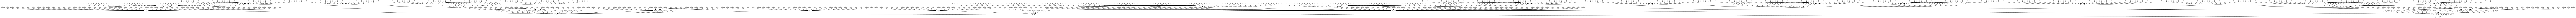

In [4]:
ggea.show(graph)

Or save it to a file as a dot file which can be open with graphviz for example.

In [5]:
ggea.export_to_dot(filename="output", graph=graph)

In [6]:
with open("output.dot") as dot:
    print(dot.read())

digraph  {
"00000000";
"11101010";
"00000001";
"00000002";
"11101011";
"00000010";
"00000011";
"00000012";
"00000100";
"00000101";
"00000102";
"00000110";
"00000111";
"00000112";
"00001000";
"00001001";
"00001002";
"00001010";
"00001011";
"00001012";
"00001100";
"00001101";
"00001102";
"00001110";
"00001111";
"00001112";
"00010000";
"00010001";
"00010002";
"00010010";
"00010011";
"00010012";
"00010100";
"00010101";
"00010102";
"00010110";
"00010111";
"00010112";
"00011000";
"00011001";
"00011002";
"00011010";
"00011011";
"00011012";
"00011100";
"00011101";
"00011102";
"00011110";
"00011111";
"00011112";
"00020000";
"11111010";
"00020001";
"00020002";
"11111011";
"00020010";
"00020011";
"00020012";
"00020100";
"00020101";
"00020102";
"00020110";
"00020111";
"00020112";
"00021000";
"00021001";
"00021002";
"00021010";
"00021011";
"00021012";
"00021100";
"00021101";
"00021102";
"00021110";
"00021111";
"00021112";
"00100000";
"11001010";
"00100001";
"00100002";
"11001011";
"00100010";
"1120

In [7]:
import os
os.remove("output.dot")